In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
data_train=pd.read_csv("C:/Users/pal/Desktop/projects/Project_12/Data_Train.csv")
data_test=pd.read_csv("C:/Users/pal/Desktop/projects/Project_12/Test_Set.csv")


Will combine dataset so further preprocessing will be easy

In [4]:
pool_data=data_train.append(data_test)
pool_data.head(2)


C:\Users\pal\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR ? DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU ? IXR ? BBI ? BLR,Kolkata,2 stops


In [5]:
pool_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              10683 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: float64(1), object(10)
memory usage: 730.3+ KB


preprocessing: will divide 'Date_of_Journey'column to date, month and year also in arrival time month and date geven is of no use and not accurate so will remove that and will split info to hour and minute.


In [6]:
pool_data["isWeekend"] = ((pd.to_datetime(pool_data["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
pool_data["Day_of_Week"] = pd.to_datetime(pool_data["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
pool_data["Day_Of_Journey"] = pd.to_datetime(pool_data["Date_of_Journey"], format = '%d/%m/%Y').dt.day
pool_data["Month_of_Journey"] = pd.to_datetime(pool_data["Date_of_Journey"], format = '%d/%m/%Y').dt.month
pool_data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [7]:
pool_data['Arrival_Time']=pool_data['Arrival_Time'].str.split(' ').str[0]
pool_data['Arrival_Hour']=pool_data['Arrival_Time'].str.split(':').str[0]
pool_data['Arrival_Minute']=pool_data['Arrival_Time'].str.split(':').str[1]
pool_data['Arrival_Hour']=pool_data['Arrival_Hour'].astype(int)
pool_data['Arrival_Minute']=pool_data['Arrival_Minute'].astype(int)
pool_data=pool_data.drop(['Arrival_Time'],axis=1)

In [8]:
pool_data['Dep_Hour']=pool_data['Dep_Time'].str.split(':').str[0]
pool_data['Dep_Minute']=pool_data['Dep_Time'].str.split(':').str[1]
pool_data['Dep_Hour']=pool_data['Dep_Hour'].astype(int)
pool_data['Dep_Minute']=pool_data['Dep_Minute'].astype(int)
pool_data=pool_data.drop(['Dep_Time'],axis=1)

In [9]:
pool_data['Total_Stops']=pool_data['Total_Stops'].replace('non-stop', '0')
pool_data['Stops']=pool_data['Total_Stops'].str.split(' ').str[0]
pool_data=pool_data.drop(['Total_Stops'],axis=1)

In [10]:
pool_data.head(2)

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stops
0,No info,IndiGo,New Delhi,2h 50m,3897.0,BLR ? DEL,Banglore,1,Sunday,24,3,1,10,22,20,0
1,No info,Air India,Banglore,7h 25m,7662.0,CCU ? IXR ? BBI ? BLR,Kolkata,0,Wednesday,1,5,13,15,5,50,2


In [11]:
pool_data['Route_1']=pool_data['Route'].str.split('?').str[0]
pool_data['Route_2']=pool_data['Route'].str.split('?').str[1]
pool_data['Route_3']=pool_data['Route'].str.split('?').str[2]
pool_data['Route_4']=pool_data['Route'].str.split('?').str[3]
pool_data['Route_5']=pool_data['Route'].str.split('?').str[4]
pool_data=pool_data.drop(['Route'],axis=1)

In [12]:
pool_data['Route_1'].fillna("None", inplace=True)
pool_data['Route_2'].fillna("None", inplace=True)
pool_data['Route_3'].fillna("None", inplace=True)
pool_data['Route_4'].fillna("None", inplace=True)
pool_data['Route_5'].fillna("None", inplace=True)
pool_data['Stops'].fillna("0", inplace=True)

In [13]:
pool_data.isnull().sum()


Additional_Info        0
Airline                0
Destination            0
Duration               0
Price               2671
Source                 0
isWeekend              0
Day_of_Week            0
Day_Of_Journey         0
Month_of_Journey       0
Arrival_Hour           0
Arrival_Minute         0
Dep_Hour               0
Dep_Minute             0
Stops                  0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

In [14]:
duration = list (pool_data["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
pool_data["Duration_minutes"] = dur_minutes
pool_data.drop(['Duration'], axis = 1, inplace = True)


In [15]:
pool_data.head(2)


,Additional_Info,Airline,Destination,Price,Source,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_minutes
0,No info,IndiGo,New Delhi,3897.0,Banglore,1,Sunday,24,3,1,10,22,20,0,BLR,DEL,None,None,None,170
1,No info,Air India,Banglore,7662.0,Kolkata,0,Wednesday,1,5,13,15,5,50,2,CCU,IXR,BBI,BLR,None,445


In [16]:
pool_data['Additional_Info']=pool_data['Additional_Info'].replace('No info', 'No Info')


In [17]:
pool_data['Additional_Info'].unique()


array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [18]:
pool_data["Destination"] = pool_data["Destination"].replace('New Delhi', 'Delhi')

In [19]:
from sklearn.preprocessing import LabelEncoder
lib=LabelEncoder()
pool_data['Additional_Info']=lib.fit_transform(pool_data['Additional_Info'])
pool_data['Airline']=lib.fit_transform(pool_data['Airline'])
pool_data['Destination']=lib.fit_transform(pool_data['Destination'])
pool_data['Source']=lib.fit_transform(pool_data['Source'])
pool_data['Route_1']=lib.fit_transform(pool_data['Route_1'])
pool_data['Route_2']=lib.fit_transform(pool_data['Route_2'])
pool_data['Route_3']=lib.fit_transform(pool_data['Route_3'])
pool_data['Route_4']=lib.fit_transform(pool_data['Route_4'])
pool_data['Route_5']=lib.fit_transform(pool_data['Route_5'])
pool_data['Day_of_Week']=lib.fit_transform(pool_data['Day_of_Week'])


In [20]:
pool_data.head(2)

,Additional_Info,Airline,Destination,Price,Source,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_minutes
0,6,3,2,3897.0,0,1,3,24,3,1,10,22,20,0,0,13,30,13,5,170
1,6,1,0,7662.0,3,0,6,1,5,13,15,5,50,2,2,25,1,3,5,445


In [21]:
pool_data.head(1)

,Additional_Info,Airline,Destination,Price,Source,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_minutes
0,6,3,2,3897.0,0,1,3,24,3,1,10,22,20,0,0,13,30,13,5,170


In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [23]:
train=pool_data[0:10683]
test=pool_data[10683:]
train.isnull().sum()

Additional_Info     0
Airline             0
Destination         0
Price               0
Source              0
isWeekend           0
Day_of_Week         0
Day_Of_Journey      0
Month_of_Journey    0
Arrival_Hour        0
Arrival_Minute      0
Dep_Hour            0
Dep_Minute          0
Stops               0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Duration_minutes    0
dtype: int64

In [24]:
train.columns

Index(['Additional_Info', 'Airline', 'Destination', 'Price', 'Source',
       'isWeekend', 'Day_of_Week', 'Day_Of_Journey', 'Month_of_Journey',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Duration_minutes'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=train.drop(['Price'], axis=1)
X=scaler.fit_transform(X)


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
X=train.drop(['Price'], axis=1)
y=train.Price

In [27]:
from sklearn import metrics
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.5110124095462877
Mean Absolute Error: 2281.8903916716554
Mean Squared Error: 9876780.697775124
Root Mean Squared Error: 3142.734589139707
None


In [29]:
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R Squared(Accuracy) 0.8555804015363639
Mean Absolute Error: 679.833554267885
Mean Squared Error: 2917048.8788121883
Root Mean Squared Error: 1707.9370242524133
None


In [30]:
#get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                  importance
Duration_minutes    0.458614
Airline             0.129534
Additional_Info     0.076960
Day_Of_Journey      0.066208
Month_of_Journey    0.050539
Route_2             0.029239
Day_of_Week         0.026373
Arrival_Hour        0.023681
Stops               0.022833
Route_4             0.022245
Dep_Hour            0.019864
Arrival_Minute      0.016826
Dep_Minute          0.016615
Route_1             0.014909
Route_3             0.009682
Destination         0.007343
isWeekend           0.004627
Source              0.003865
Route_5             0.000045


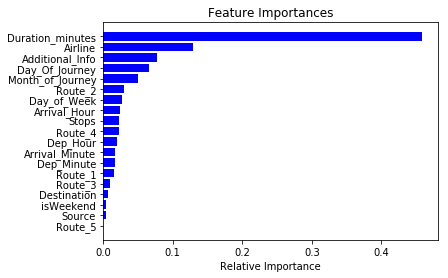

In [31]:
plotFeatureImportances(randomForestModel)

In [32]:
test.head(2)

,Additional_Info,Airline,Destination,Price,Source,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_minutes
0,6,4,1,NaN,2,0,4,6,6,4,25,17,30,1,3,7,6,13,5,655
1,6,3,0,NaN,3,1,3,12,5,10,20,6,20,1,2,33,3,13,5,240


In [42]:
def generateFinalPredictionFile(model):
   
    df_test_result = test[['Additional_Info', 'Airline', 'Destination', 'Source',
       'isWeekend', 'Day_of_Week', 'Day_Of_Journey', 'Month_of_Journey',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Duration_minutes']]

    preds_1 = model.predict(df_test_result)
    df_test_result['Price'] = preds_1
    df_test_result['Price'].to_csv('submission.csv')


In [43]:
generateFinalPredictionFile(randomForestModel)

C:\Users\pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()
